# Plotting Ethnicity Alameda 2011 to 2019

## Chaithra

Plotting graphs and maps, taking on from the previous notebook. We will aim to check the change with histograms, and plot simple maps. 

Libraries required:

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Reading the combined file, created during the last notebook

In [2]:
ethnala=gpd.read_file('ealamed2.geojson')

In [3]:
ethnala.head()

,GEOID,NAME,Total_2019,Non Hispanic_2019,Non Hispanic White_2019,Non Hispanic Black_2019,Non Hispanic American Indian and Alaska Native_2019,Non Hispanic Asian_2019,Non Hispanic Native Hawaiian and Other Pacific Islander_2019,Non Hispanic Some other race_2019,...,Non Hispanic_change,Non Hispanic White_change,Non Hispanic Black_change,Non Hispanic American Indian and Alaska Native_change,Non Hispanic Asian_change,Non Hispanic Native Hawaiian and Other Pacific Islander_change,Non Hispanic Some other race_change,Non Hispanic Two or more races_change,Hispanic_change,geometry
0,14000US06001400100,"Census Tract 4001, Alameda, CA",3120.0,3002.0,2317.0,107.0,0.0,391.0,0.0,0.0,...,26.880811,22.333685,-13.709677,NaN,71.491228,-100.0,NaN,79.807692,38.823529,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,14000US06001400200,"Census Tract 4002, Alameda, CA",2007.0,1833.0,1475.0,52.0,4.0,171.0,0.0,0.0,...,-4.231975,0.340136,-27.777778,-69.230769,-26.293103,NaN,-100.000000,11.965812,-7.936508,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
2,14000US06001400300,"Census Tract 4003, Alameda, CA",5051.0,4700.0,3434.0,459.0,0.0,590.0,23.0,97.0,...,1.577696,-3.049125,-21.404110,-100.000000,102.749141,NaN,NaN,-43.274854,-23.861171,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
3,14000US06001400400,"Census Tract 4004, Alameda, CA",4007.0,3522.0,2554.0,266.0,35.0,420.0,0.0,0.0,...,0.830232,-2.667683,-21.533923,20.689655,165.822785,NaN,-100.000000,-11.151079,7.777778,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."
4,14000US06001400500,"Census Tract 4005, Alameda, CA",4124.0,3734.0,1874.0,882.0,0.0,446.0,22.0,6.0,...,19.679487,12.350120,-17.260788,-100.000000,139.784946,NaN,-57.142857,188.000000,8.033241,"MULTIPOLYGON (((-122.26951 37.84858, -122.2693..."


## Histograms

Creating a function to create histograms. We use histograms, becasuse we need to know the range of the percentage changes, and a rough idea of frequency distribution of the census tracts. 

In [4]:
def create_hist(col, col2):
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(ethnala[col], bins = [-100, 0, 50, 100,200])
    ax.set_xlabel(col)
    ax.set_ylabel("No. of Census Tracts")
    ax.set_title(r'Histogram')
    plt.show()


We create a series, that will allow us to make hisograms through a loop

In [5]:
cols=['Total_change',
 'Non Hispanic_change',
 'Non Hispanic White_change',
 'Non Hispanic Black_change',
 'Non Hispanic American Indian and Alaska Native_change',
 'Non Hispanic Asian_change',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_change',
 'Non Hispanic Some other race_change',
 'Non Hispanic Two or more races_change',
 'Hispanic_change']

Looping the histogram creation.


Total Population


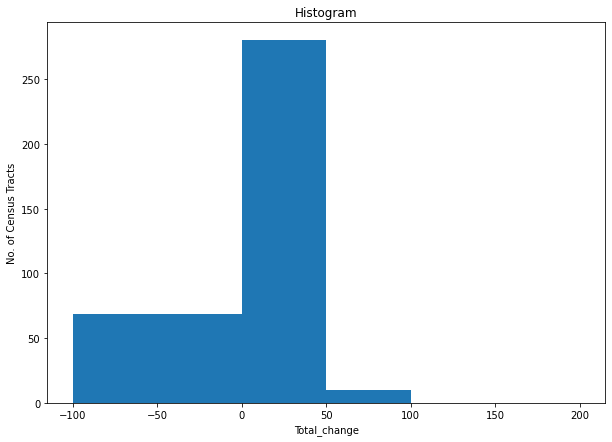


Non Hispanic Population


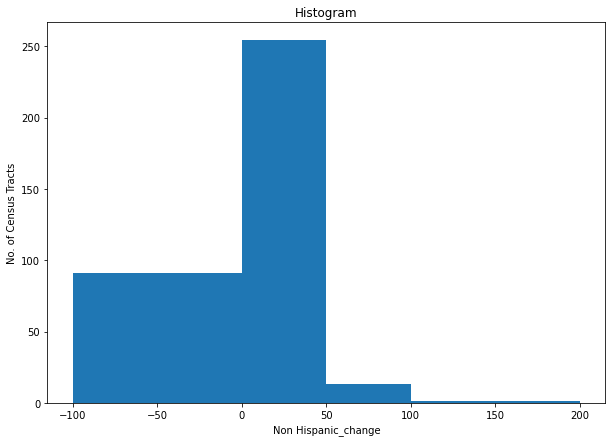


Non Hispanic White Population


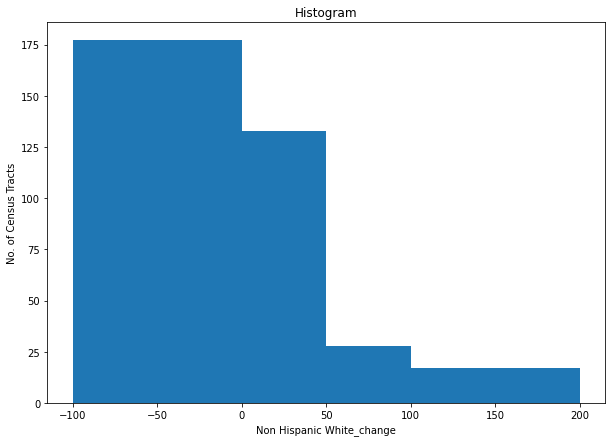


Non Hispanic Black Population


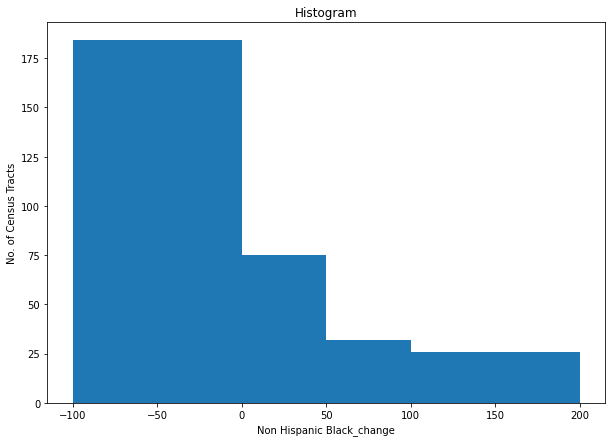


Non Hispanic American Indian and Alaska Native Population


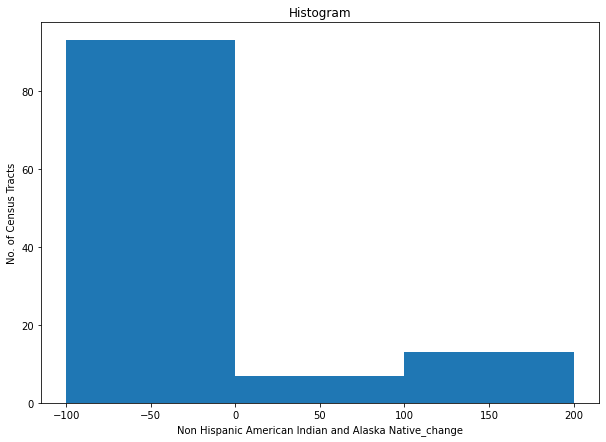


Non Hispanic Asian Population


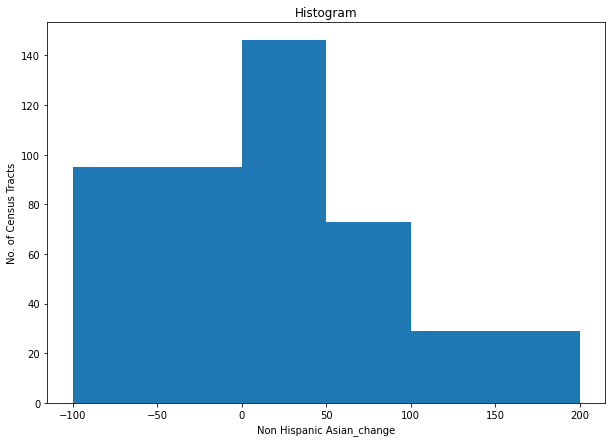


Non Hispanic Native Hawaiian and Other Pacific Islander Population


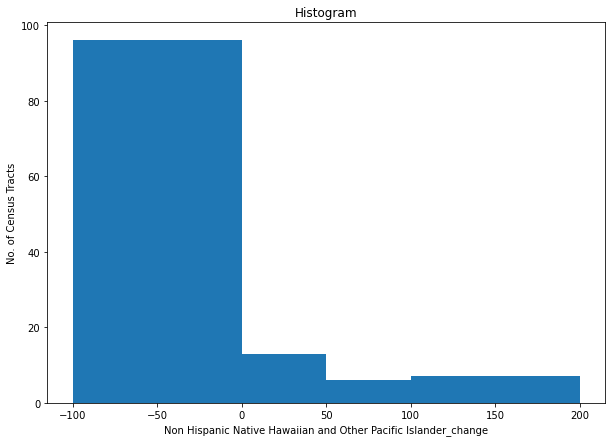


Non Hispanic Some other race Population


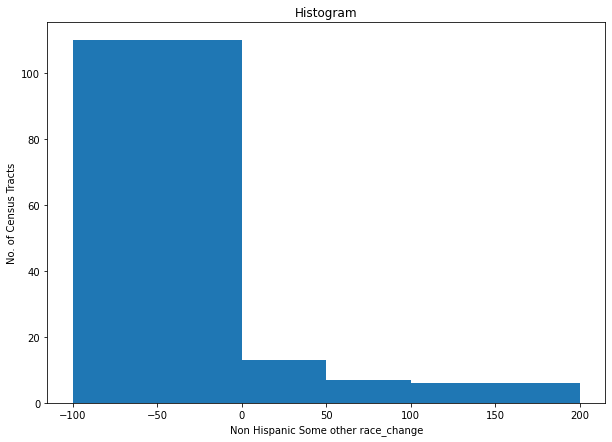


Non Hispanic Two or more races Population


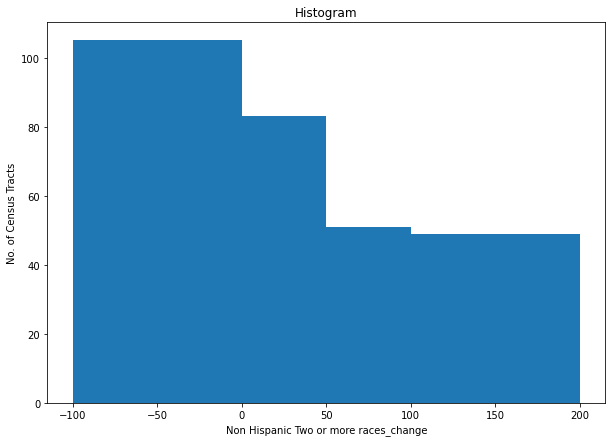


Hispanic Population


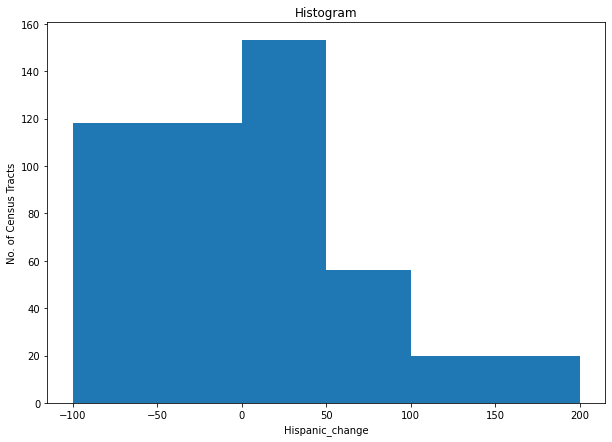

In [6]:
for i in cols:
    x="\n"+i.split("_")[0]+" Population"
    print(x)
    create_hist(i,x)

Loocountyaverage2019=county2019.mean(axis=0, numeric_only=True)ks like most of the changes are 0-50% increase or decline. With that spirit, let us explore the average change in alameda. We first subset to create a dataframe with only the columns indicating percentage change


In [7]:
alaaverage=ethnala[cols]

Using the average function over rows. 

In [8]:
averageala=alaaverage.mean(axis=0, numeric_only=True)

In [16]:
averageala

Total_change                                                       12.508455
Non Hispanic_change                                                12.261748
Non Hispanic White_change                                          13.470849
Non Hispanic Black_change                                          77.313671
Non Hispanic American Indian and Alaska Native_change              33.117042
Non Hispanic Asian_change                                          45.822149
Non Hispanic Native Hawaiian and Other Pacific Islander_change     97.667396
Non Hispanic Some other race_change                               -35.601968
Non Hispanic Two or more races_change                             208.219898
Hispanic_change                                                    33.481771
dtype: float64

In [17]:
averagetract=averageala.to_frame().rename(columns={0:'Value'})

In [18]:
averagetract

,Value
Total_change,12.508455
Non Hispanic_change,12.261748
Non Hispanic White_change,13.470849
Non Hispanic Black_change,77.313671
Non Hispanic American Indian and Alaska Native_change,33.117042
Non Hispanic Asian_change,45.822149
Non Hispanic Native Hawaiian and Other Pacific Islander_change,97.667396
Non Hispanic Some other race_change,-35.601968
Non Hispanic Two or more races_change,208.219898
Hispanic_change,33.481771


In [19]:
county=['Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic']

In [23]:
averagetract['Ethnicity']=county

In [24]:
averagetract

,Value,Ethnicity
Total_change,12.508455,Total
Non Hispanic_change,12.261748,Non Hispanic
Non Hispanic White_change,13.470849,Non Hispanic White
Non Hispanic Black_change,77.313671,Non Hispanic Black
Non Hispanic American Indian and Alaska Native_change,33.117042,Non Hispanic American Indian and Alaska Native
Non Hispanic Asian_change,45.822149,Non Hispanic Asian
Non Hispanic Native Hawaiian and Other Pacific Islander_change,97.667396,Non Hispanic Native Hawaiian and Other Pacific...
Non Hispanic Some other race_change,-35.601968,Non Hispanic Some other race
Non Hispanic Two or more races_change,208.219898,Non Hispanic Two or more races
Hispanic_change,33.481771,Hispanic


In [25]:
import plotly.express as px


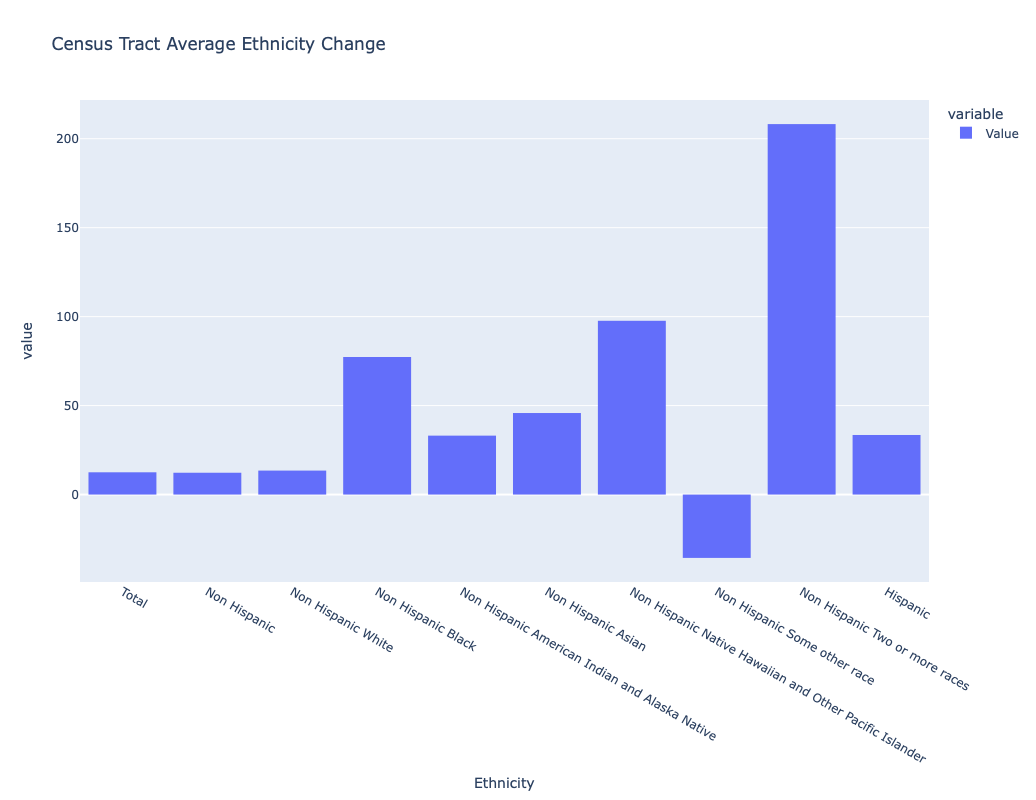

In [32]:

fig = px.bar(averagetract,
       x='Ethnicity',
       y=['Value'],
       title='Census Tract Average Ethnicity Change',
       height=800
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

As you can see, for most races, the average is below 50% increase. Now let us try plotting the graps. 

## Maps

We will again loop through the percentage change columns

In [10]:
# reproject to Web Mercator
ethnala_webmer = ethnala.to_crs(epsg=3857)

In [11]:
list(ethnala)

['GEOID',
 'NAME',
 'Total_2019',
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'Percent Total_2019',
 'Percent Non Hispanic_2019',
 'Percent Non Hispanic White_2019',
 'Percent Non Hispanic Black_2019',
 'Percent Non Hispanic American Indian and Alaska Native_2019',
 'Percent Non Hispanic Asian_2019',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Percent Non Hispanic Some other race_2019',
 'Percent Non Hispanic Two or more races_2019',
 'Percent Hispanic_2019',
 'Total_2011',
 'Non Hispanic_2011',
 'Non Hispanic White_2011',
 'Non Hispanic Black_2011',
 'Non Hispanic American Indian and Alaska Native_2011',
 'Non Hispanic Asian_2011',
 'Non Hispanic Native Hawaiian and Other Pacific

In [12]:
maps=['Total_change',
 'Non Hispanic_change',
 'Non Hispanic White_change',
 'Non Hispanic Black_change',
 'Non Hispanic American Indian and Alaska Native_change',
 'Non Hispanic Asian_change',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_change',
 'Non Hispanic Some other race_change',
 'Non Hispanic Two or more races_change',
 'Hispanic_change',
 'geometry']

TypeError: Invalid keyword argument for 'userdefined' 

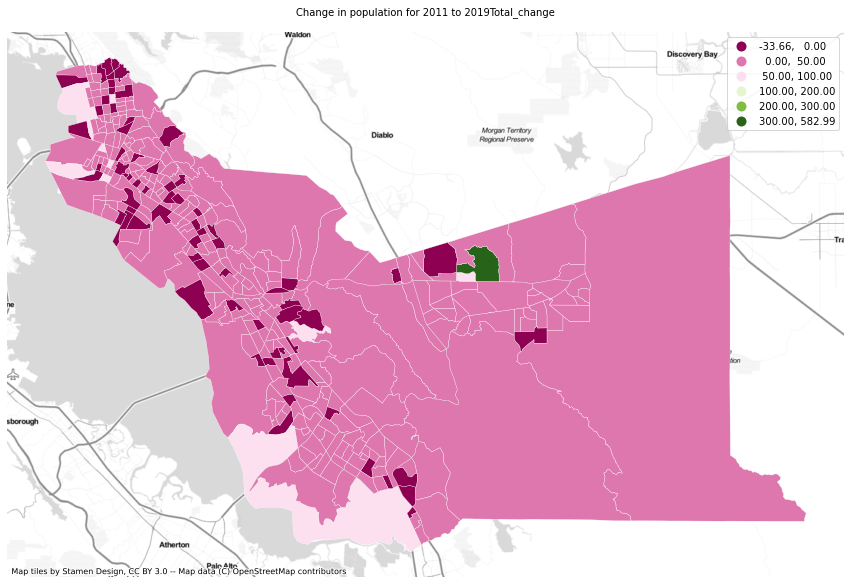

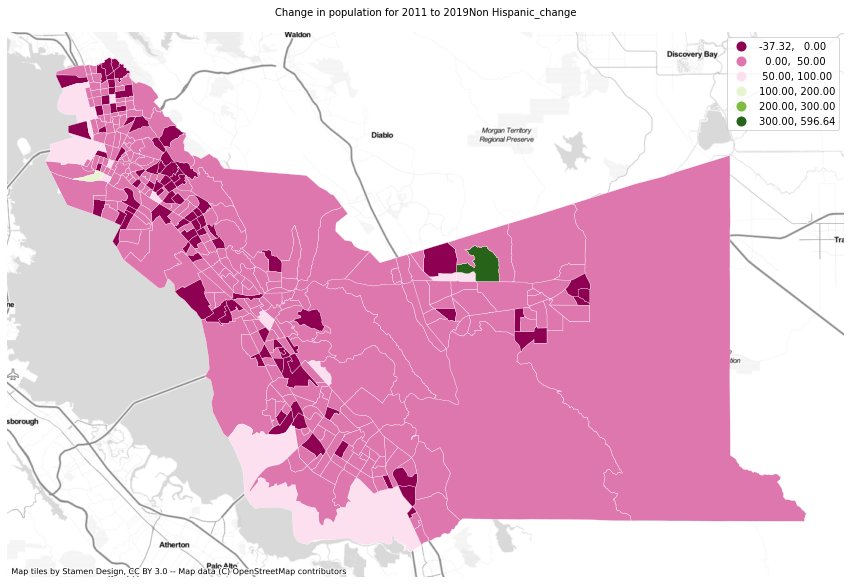

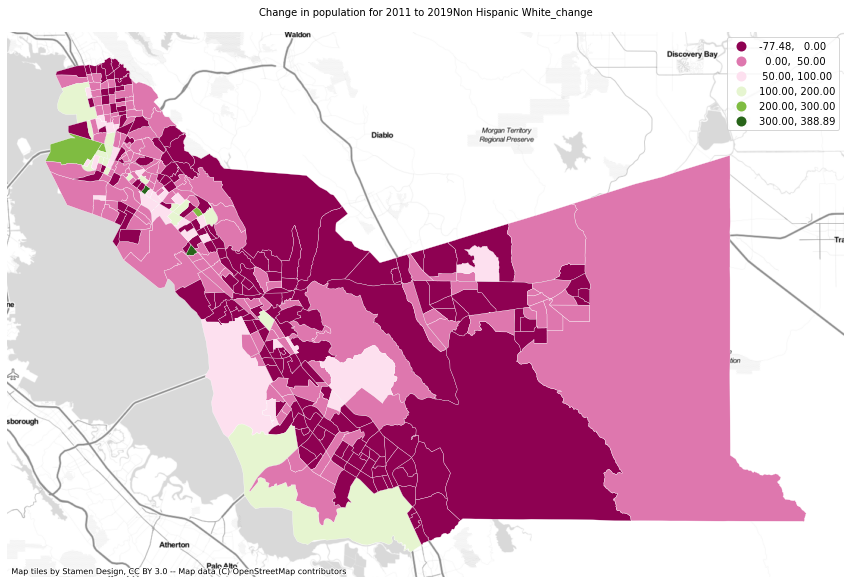

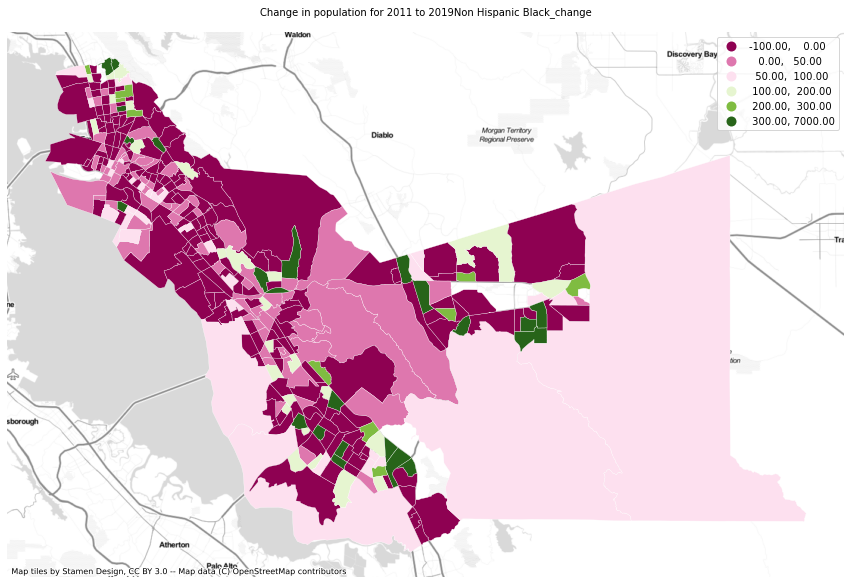

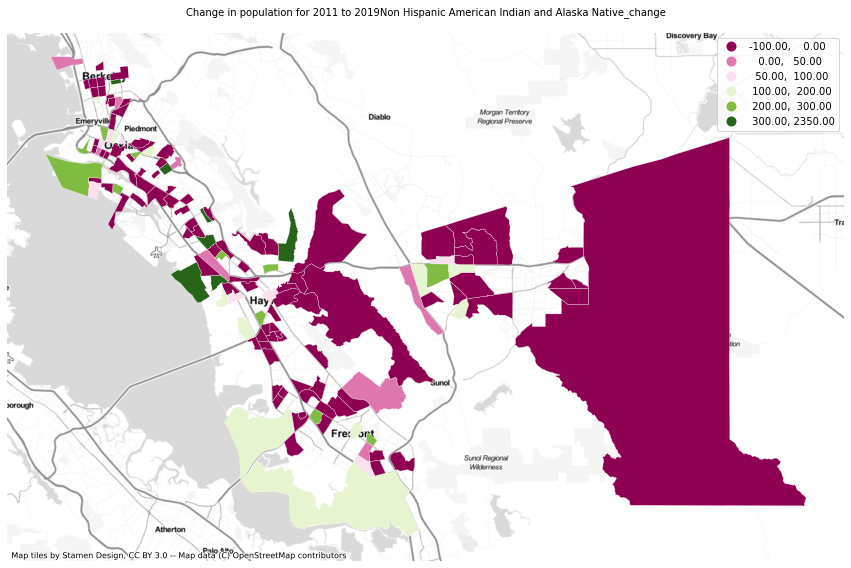

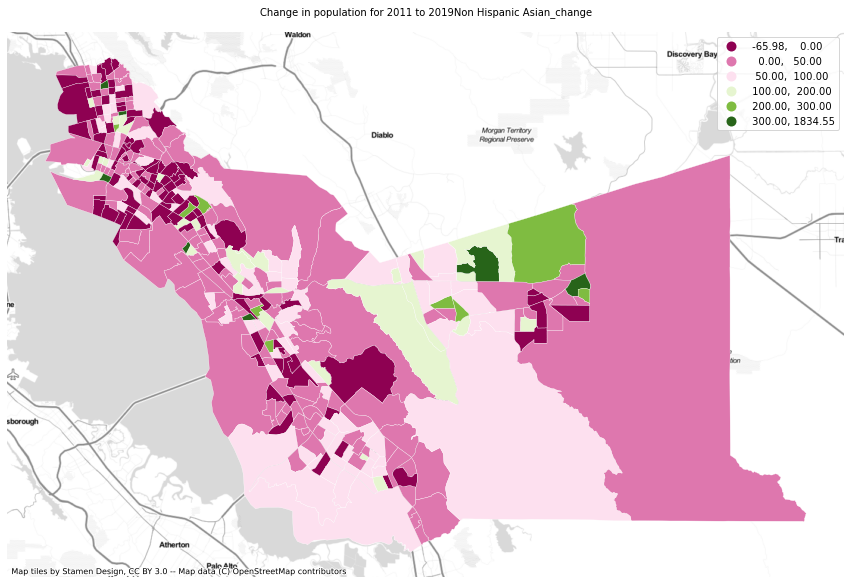

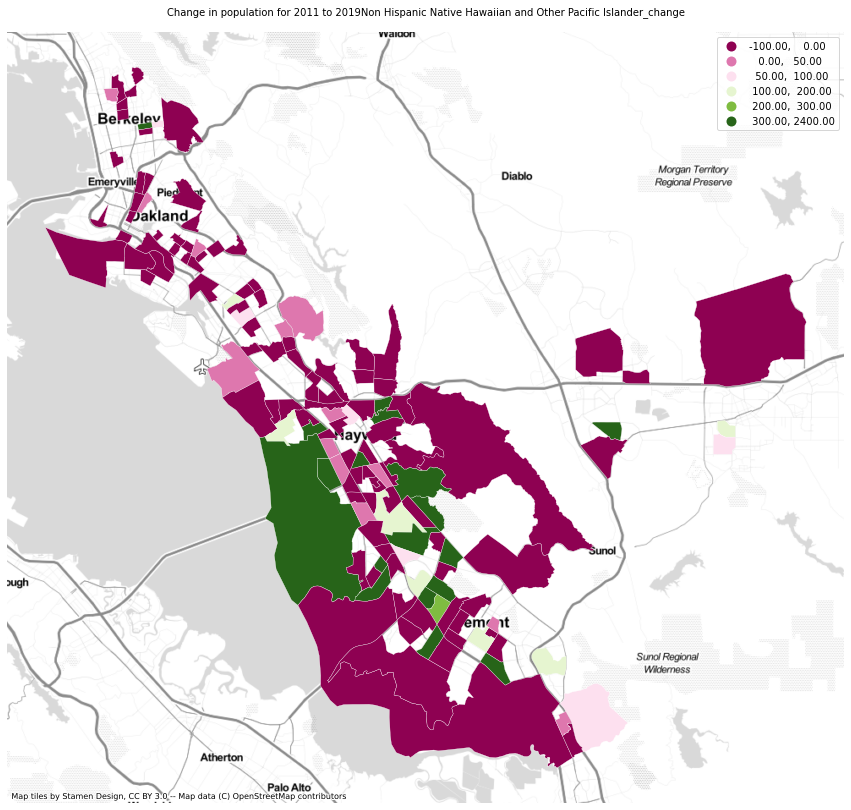

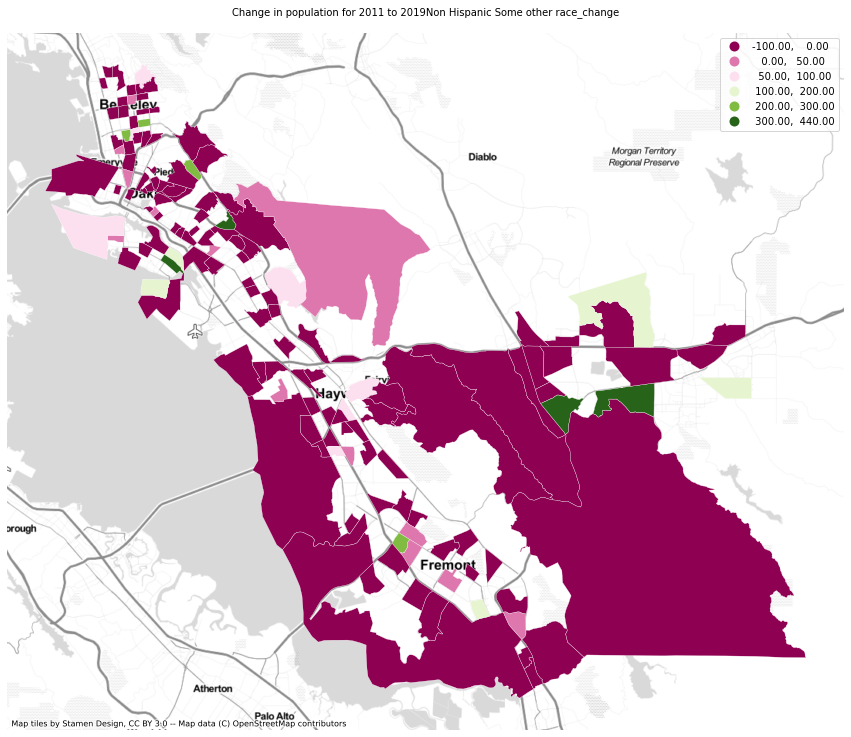

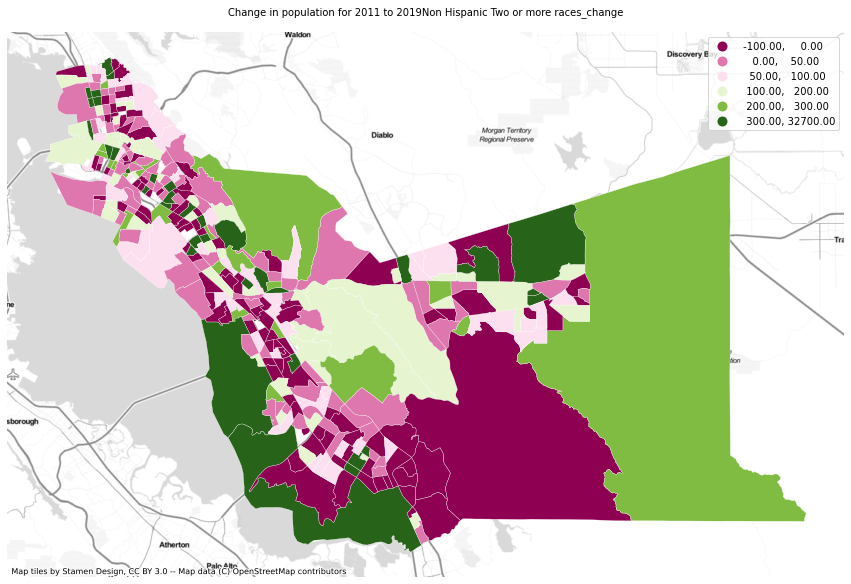

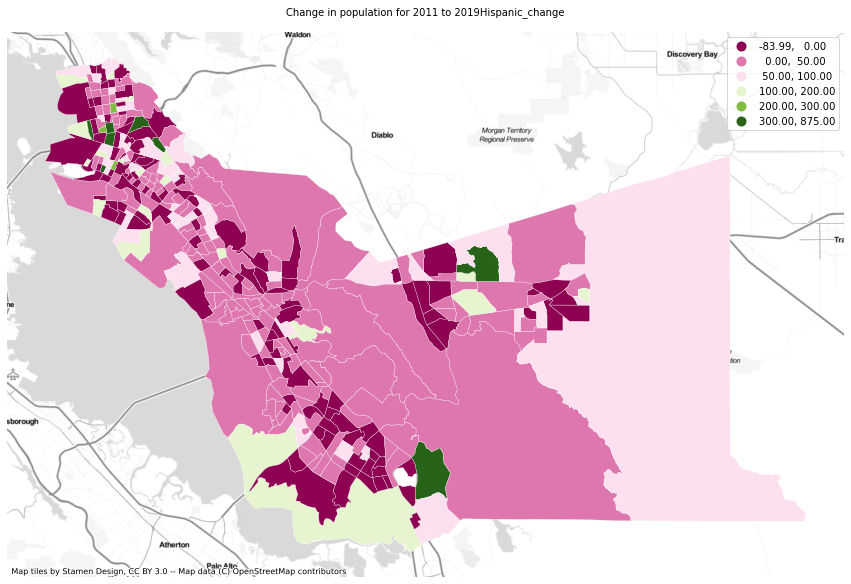

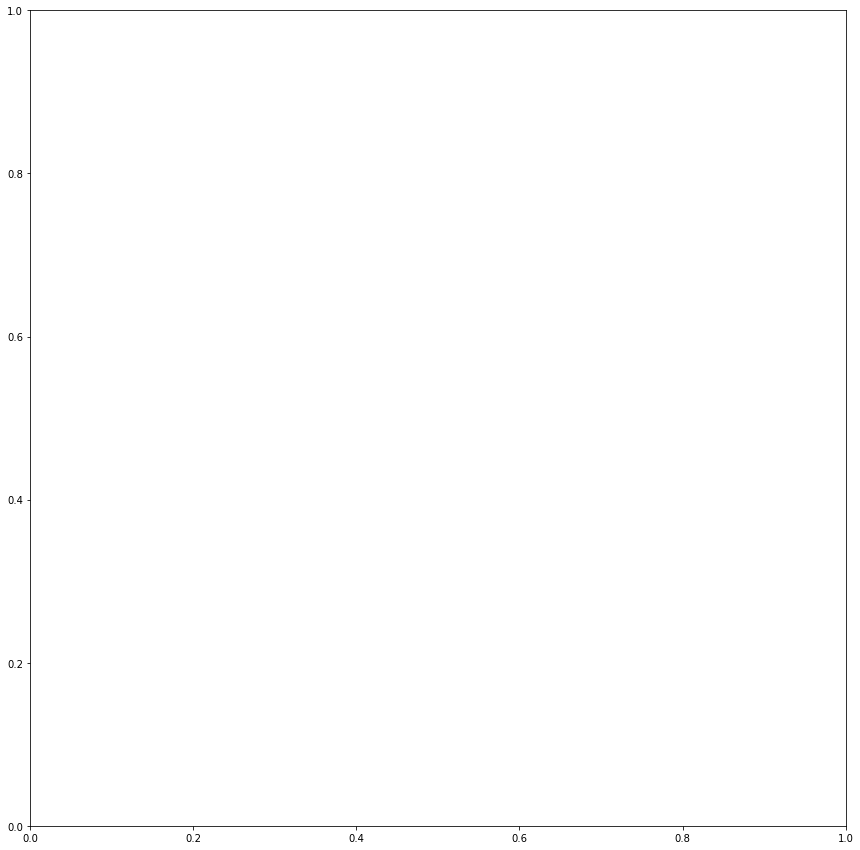

In [13]:
for i in maps:
    fig, ax = plt.subplots(figsize=(15, 15))
    ethnala_webmer.plot(column=ethnala[i],
                        cmap='PiYG', 
                        scheme='user_defined',
                        classification_kwds={'bins':[0,50,100,200,300]},
                        edgecolor='white', 
                        linewidth=0.3, 
                        ax=ax, 
                        legend=True
                       )
    ax.axis('off')
    ax.set_title('Change in population for 2011 to 2019'+i,fontsize=10,pad=18)
    ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

Now let us deal with the inf values from earlier. We will subset the original data and cnage all 2011 vaues with 0 to 0.01

In [ ]:
ethnchange=ethnala[['GEOID',
 'NAME',
 'Total_2019',
 'Non Hispanic_2019',
 'Non Hispanic White_2019',
 'Non Hispanic Black_2019',
 'Non Hispanic American Indian and Alaska Native_2019',
 'Non Hispanic Asian_2019',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2019',
 'Non Hispanic Some other race_2019',
 'Non Hispanic Two or more races_2019',
 'Hispanic_2019',
 'Total_2011',
 'Non Hispanic_2011',
 'Non Hispanic White_2011',
 'Non Hispanic Black_2011',
 'Non Hispanic American Indian and Alaska Native_2011',
 'Non Hispanic Asian_2011',
 'Non Hispanic Native Hawaiian and Other Pacific Islander_2011',
 'Non Hispanic Some other race_2011',
 'Non Hispanic Two or more races_2011',
 'Hispanic_2011',
 'geometry']]

In [ ]:
ethnchange.info()

We need numpy to do this operation

In [ ]:
import numpy as np

In [ ]:
ethnchange.head()

In [ ]:
eth2=ethnchange.replace(to_replace=0, value=0.01)

In [ ]:
eth2.head()

### Creating the percentage change from 2011 to 2019 columns

In [ ]:
for i in list(ethnchange.columns):
    if "2019" in i:
        ethnchange[i.split("_")[0]+"_change"]= (((ethnchange[i]-ethnchange[i.split("_")[0]+"_2011"])/ethnchange[i.split("_")[0]+"_2011"])*100)
       

In [ ]:
ethnchange.head()

In [ ]:
ethnchange.columns

THis was a code used in some iteration of the process, but abandoned for now.
ethnchange.replace([np.inf, -np.inf], np.nan, inplace=True)
ethnchange.dropna(inplace=True)
ethnchange.sample(5)

Let us try a sample plot. Will nto promise to be great, just for a trial

In [ ]:

# for interactive plots
import plotly.express as px

In [ ]:
# a simple bar chart, putting date on the x-axis
fig = px.bar(ethnchange,
       x='NAME',
        y='Total_change',
       title='Total_change'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

That is a strange and useless plot. In the next notebook, we create the average cencus tract.